In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import scipy.integrate as integrate
from scipy import special

# Problem 1

Text(0, 0.5, 'probability')

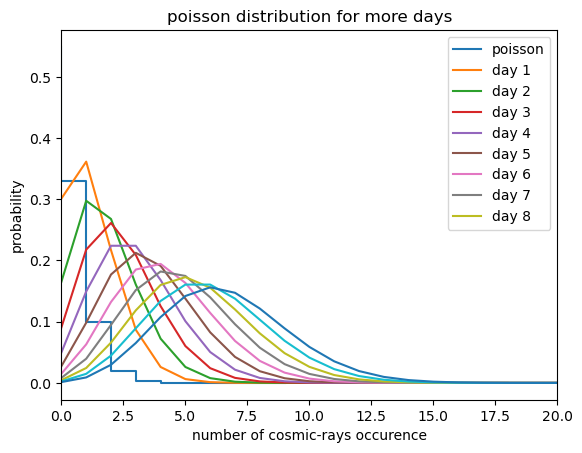

In [4]:
from scipy.stats import poisson

mu = 0.6
x = np.arange(0, 10)
y = stats.poisson.pmf(x, mu)
pr = np.convolve(y, y)
fig, ax = plt.subplots(1,1)

ax.step(x, stats.poisson.pmf(x, mu))
ax.plot(np.arange(0, 19), pr)
pr = np.convolve(y, y)

for x in range(1,10):
    pr = np.convolve(y, pr)
    ax.plot(np.arange(0, 19+10*x-x), pr)
    plt.legend(["poisson","day 1", "day 2", "day 3", "day 4", "day 5", "day 6", "day 7", "day 8"])
    
plt.xlim([0,20])
plt.title("poisson distribution for more days")
plt.xlabel("number of cosmic-rays occurence")
plt.ylabel("probability")


A. The probability distribution is getting more normalized and shiftd to the right as more days are summed 

B. Convolution of the poisson distribution remains a poisson distribution. Conceptually, given the average of the occurence of many day. Start from the first few day, there might have a few occurence around 2-3 times and a very small probability of 10 time. However, with more summed day, the distribution should be getting more normalized to fit with the avergy mean.

C. The probability distribution is getting more normalized as it vlolves. However, the number of average remains closely the same since the scale of x-axis is getting smaller with more summd days. The shape becomes like a normal distribution, which ingratiate with the central limit theory that the sum tends toward a normal distribution even if the original variableare not normally distributed when independent random variables are summed up.

Text(0, 0.5, 'probability')

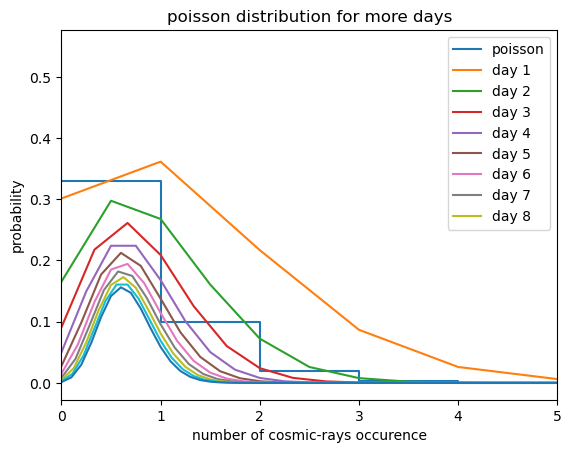

In [41]:
mu = 0.6
x = np.arange(0, 10)
y = stats.poisson.pmf(x, mu)
pr = np.convolve(y, y)
fig, ax = plt.subplots(1,1)

ax.step(x, stats.poisson.pmf(x, mu))
ax.plot(np.arange(0, 19), pr)

pr = np.convolve(y, y)

for x in range(1,10):
    pr = np.convolve(y, pr)
    ax.plot(np.arange(0, 19+10*x-x)/(x+1), pr)
    plt.legend(["poisson","day 1", "day 2", "day 3", "day 4", "day 5", "day 6", "day 7", "day 8"])


    
plt.xlim([0,5])
plt.title("poisson distribution for more days")
plt.xlabel("number of cosmic-rays occurence")
plt.ylabel("probability")


The above plot takes the average day, so we need to divide the range by days and get the plot 

D. For the eighth day N=8 and Y = 2. 

In [150]:
N = 8
Y = 1
probability = 1 - poisson.cdf(N*Y, 0.6)
print(probability)
sigma = stats.norm.ppf(1-probability)
print(sigma)

1.620825496040368e-08
5.527857544469549


The probability is 5.527 sigma assuming 8 gamma rays is observed in the 8 days 

# Problem 2

9


Text(0, 0.5, 'probability')

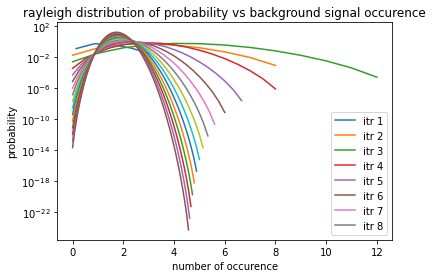

In [32]:
from scipy.stats import rayleigh
s = 5
x = np.linspace(rayleigh.ppf(0.01),
                rayleigh.ppf(0.99), s)
y = stats.rayleigh.pdf(x)
pr = np.convolve(y, y)
print(len(pr))

fig, ax = plt.subplots(1,1)

ax.plot(x, rayleigh.pdf(x))
ax.plot(np.arange(0, 2*s-1), pr)

for i in range(1,15):
    pr = np.convolve(y, pr)
    ax.plot(np.arange(0, (2*s-1+s*i-i))/i, pr)
    plt.legend(["itr 1", "itr 2", "itr 3", "itr 4", "itr 5", "itr 6", "itr 7", "itr 8"])

plt.yscale('log')
plt.title("rayleigh distribution of probability vs background signal occurence")
plt.xlabel("number of occurence")
plt.ylabel("probability")

Thee above plot should the rayleigh distribution of different intervals and how it changes within more iteration of convolution

A. The distribution is getting more condensed from a wide range to a narrower range. 

B. the shape is getting closer to Gaussian and number of interation increases. The general shape is more clear after 3 rd interation.  

# Problem 3

In [7]:
X = 3
Y = 17.5
d = stats.norm(scale = X)

probability = d.sf(Y)
sigma = stats.norm.ppf(1-probability)

print(probability)
print(sigma)


2.716543737088116e-09
5.8333333314532485


A) No, we can not claim a discovery. With a sigma value large than 5, the probability is super small to the point that could be regarded as random fluke.

(-30.0, 30.0)

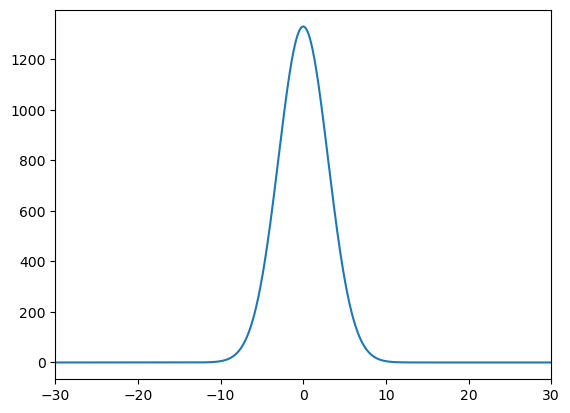

In [20]:
d = stats.norm(scale = X)

fig, ax = plt.subplots()
x = np.linspace(-40, 40, 10000)
ax.plot(x, 10000*stats.norm.pdf(x, scale = 3))
plt.xlim([-30,30])

B) What would the probability distribution be like given a look forr a signal in 10k pixels? So 
the middle of distribution we don't really have an idea of what is going on, but we can approximate the probability on the verge of the distribution where the probability is small enough. For p_none = 1 - p_any -> that p_any = 1 - P, do the taylor expansion and remove the O(N^2) since N is a big number and relatively small than N, we will end up getting NP as the result for the probability distribution. 

In [101]:
probability = 10000 * (1 - d.cdf(Y))
sigma = stats.norm.ppf(1-probability)

print(probability)
print(sigma)

2.7165437677112436e-05
4.036169911986509


C) The significance of the detection is 4.03 sigma

# Problem 4 

In [34]:
# A
five_sigma = 3*10**-7 
X = 3
Y = 17.5
d = stats.norm(scale = X)

strength1 = d.isf(five_sigma)
print("the signal require for a 5-sigma detection in Version 1 is", strength)

the signal require for a 5-sigma detection in Version 1 is 20.638948509808206


In [31]:
# B
five_sigma = 3*10**-7 
X = 3
Y = 17.5
d = stats.norm(scale = X)

strength2 = d.isf(five_sigma/100000)
print("the signal require for a 5-sigma detection in Version 2 is", strength)

the signal require for a 5-sigma detection in Version 2 is 20.638948509808206


In [43]:
signal = strength2/strength1
print(signal)

1.3783510735813482


From a trials factor of 10k, thee signal is 37.8% brighter

C) Even the trial factor is a hugee number, the probability of stronger signal is getting way smaller so the sensitvity penality due to a trials factor is not as high. 

In [46]:
strengthD = d.isf(five_sigma/(100000**2))
print(strengthD)

25.095676864744313


D) Even I take the power of 2 of 10k, the increment of the signal streength is not as big (only increased by 5). Therefore, it's not a large effect on the 5-sigma threshold.

EX: For many trials, the affect of the sensitivity would be similar as we are taking the probability of the very low part of the distribution (so the probability is really small for the NP approximation). The affect would therefore remains similar to gaussian distribution. 